# Example usage using a Boston sea level dataset

## Initialize a GeslaDataset object
Place the `gesla.py` file in your working directory (or elsewhere on your path), and import the `GeslaDataset` class. Selecting and loading data files requires paths to the metadata .csv file and the directory containing the data files. Initialize a `GeslaDataset` object with these paths as follows.

In [49]:
from gesla import GeslaDataset
import matplotlib.pyplot as plt

meta_file = "/work/Katherine.Turner/sealevel/data/GESLA3_ALL.csv"
data_path = "/work/Katherine.Turner/sealevel/data/"

g3 = GeslaDataset(meta_file=meta_file, data_path=data_path)

## Load data from a list of files
If you want to work with data from multiple files, and you know the filenames you want, use the function `files_to_xarray` as follows. The function returns a `xarray.Dataset` object containing data, flags, and metadata.

In [43]:
filenames = [
    "charleston_sc-261b-usa-uhslc",
    "boston_ma-741a-usa-uhslc"
]
ds = g3.files_to_xarray(filenames)
ds

<xarray.Dataset>
Dimensions:                  (date_time: 856123, station: 2)
Coordinates:
  * date_time                (date_time) datetime64[ns] 1921-05-03T05:00:00 ....
  * station                  (station) int64 0 1
Data variables: (12/27)
    sea_level                (station, date_time) float64 nan nan ... 3.354 3.88
    qc_flag                  (station, date_time) float64 nan nan ... 1.0 1.0
    use_flag                 (station, date_time) float64 nan nan ... 1.0 1.0
    filename                 (station) object 'boston_ma-741a-usa-uhslc' 'cha...
    site_name                (station) object 'Boston_MA' 'Charleston_SC'
    site_code                (station) object '741A' '261B'
    ...                       ...
    datum_information        (station) object 'Unspecified' 'Unspecified'
    instrument               (station) object 'Unspecified' 'Unspecified'
    precision                (station) object 'Unspecified' 'Unspecified'
    null_value               (station) float64 -100.0 -100.0
    gauge_type               (station) object 'Coastal' 'Coastal'
    overall_record_quality   (station) object 'No obvious issues' 'No obvious...

## Visualizing data using xarray

Xarray provides a useful framework for plotting time series data. First we mask out all values associated with the missing value flag or the bad data flag.

We can then plot part of the long timeseries for Boston sea level. What can you note about the behavior of sea level here?

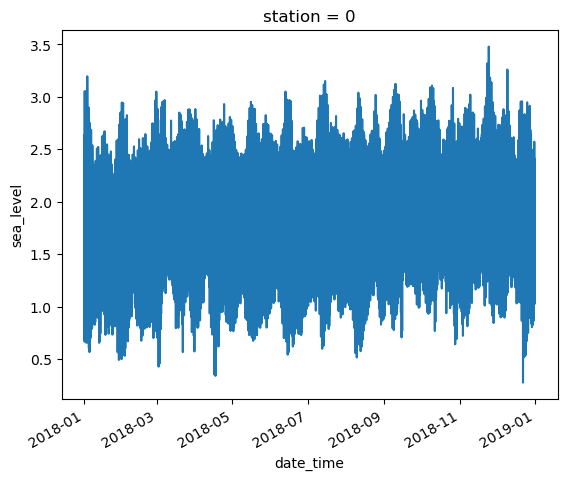

In [44]:
ds_masked = ds.where(ds.sea_level != -99.9999)
ds_masked.sea_level[0,(-1*365*24):].plot()

## Grouping data and creating averages

We can now group the entire sea level time series by day of year, effectively giving an approximation of the average seasonal cycle. 
Note that the seasonal cycles for the two time series are very similar:

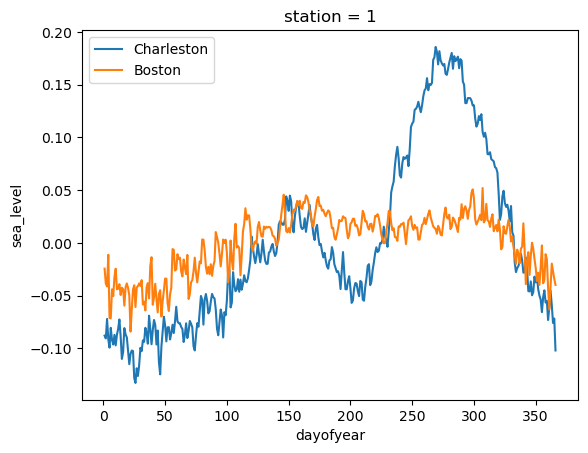

In [50]:
seasonal_charleston = ds_masked.sea_level[0,:].groupby(ds_masked.date_time.dt.dayofyear).mean()
seasonal_boston = ds_masked.sea_level[1,:].groupby(ds_masked.date_time.dt.dayofyear).mean()

(seasonal_charleston - seasonal_charleston.mean()).plot(label="Charleston")
(seasonal_boston - seasonal_boston.mean()).plot(label="Boston")
plt.legend()

## Looking at extreme values for sea level



In [51]:
q99 = ds_masked.sea_level[0,:].quantile(.99)

ds_extreme = ds_masked.where(ds_masked.sea_level >= q99)

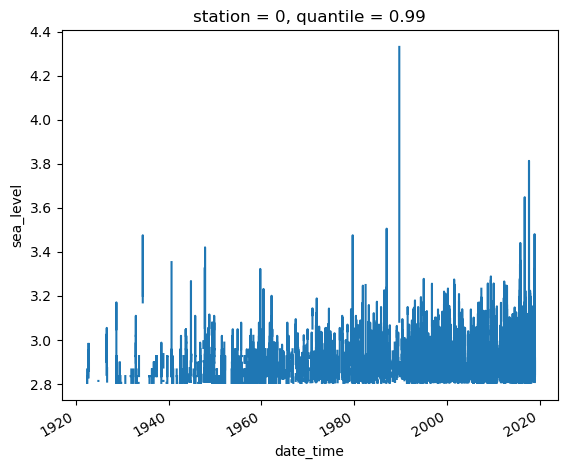

In [52]:
ds_extreme.sea_level[0,:].plot()

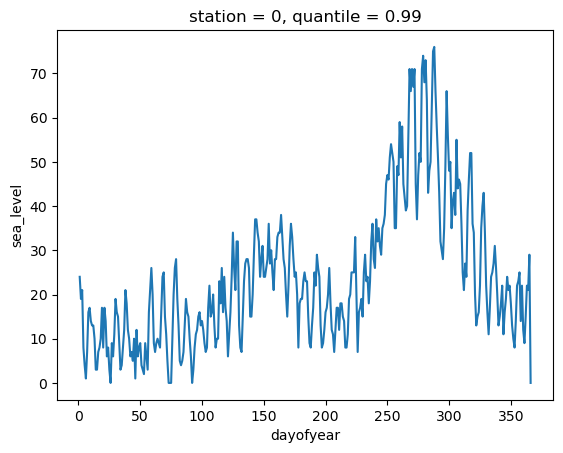

In [53]:
(ds_extreme.sea_level[0,:].groupby(ds_extreme.date_time.dt.dayofyear).count()).plot()